In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from itertools import product
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

In [2]:
dir_name = 'data_231206_ao_features'
labels = pd.read_parquet(os.path.join(dir_name, 'partitions.parquet'))
labels['aid'] = 'aid_' + labels['oid']
labels.set_index('aid', inplace=True)

list_of_classes = labels['alerceclass'].unique()
list_of_classes.sort()

labels_figure_order = [
    'SNIa',
    'SNIbc',
    'SNIIb',
    'SNII',
    'SNIIn',
    'SLSN',
    'TDE',
    'Microlensing',
    'QSO',
    'AGN',
    'Blazar',
    'YSO',
    'CV/Nova',
    'LPV',
    'EA',
    'EB/EW',
    'Periodic-Other',
    'RSCVn',
    'CEP',
    'RRLab',
    'RRLc',
    'DSCT'
]
assert set(list_of_classes) == set(labels_figure_order)

In [3]:
predictions_filename = 'mlp_predictions_wo_input_drop.parquet'
# predictions_filename = 'hrf_predictions.parquet'
predictions = pd.read_parquet(os.path.join(dir_name, predictions_filename))
predictions

,AGN,Blazar,CEP,CV/Nova,DSCT,EA,EB/EW,LPV,Microlensing,Periodic-Other,...,RSCVn,SLSN,SNII,SNIIb,SNIIn,SNIa,SNIbc,TDE,YSO,shorten
aid_ZTF17aaaazva,8.852277e-11,1.434831e-11,9.981354e-01,6.007502e-07,2.736976e-08,1.511493e-05,3.210463e-06,8.044986e-05,5.792330e-13,4.941217e-07,...,2.179118e-04,7.686790e-24,4.546900e-14,7.884054e-28,9.453430e-25,3.200406e-11,1.262236e-18,6.135821e-21,1.220846e-03,1024
aid_ZTF17aaaeayj,1.428025e-09,3.517741e-07,1.302434e-02,2.279607e-03,4.177490e-08,2.280274e-05,5.367627e-06,7.616973e-05,1.566868e-13,8.428889e-07,...,9.208828e-06,1.260523e-20,1.499867e-12,1.178377e-25,1.214150e-20,7.186545e-11,3.322780e-16,3.222324e-20,9.845607e-01,1024
aid_ZTF17aaafynz,4.393217e-12,1.018397e-12,2.826519e-06,2.215086e-06,2.037494e-07,2.223845e-02,9.776139e-01,3.342713e-08,1.443690e-15,3.507419e-08,...,1.565058e-08,1.282412e-19,4.984115e-12,1.484271e-23,1.374543e-17,7.639776e-12,5.872086e-15,3.868627e-18,1.176673e-06,1024
aid_ZTF17aaagrkx,7.861469e-12,5.599785e-13,1.668967e-05,6.530756e-07,2.104443e-05,3.307483e-02,9.667872e-01,5.758457e-08,2.960336e-15,6.408619e-07,...,2.975508e-07,5.162469e-19,2.053500e-11,3.722632e-18,7.322595e-16,4.264763e-11,1.110392e-13,5.826487e-17,2.082979e-06,1024
aid_ZTF17aaagvif,1.703466e-06,1.144159e-06,3.981646e-03,8.284909e-05,4.740894e-06,1.055061e-04,9.506307e-05,1.003396e-03,1.000759e-15,1.182396e-03,...,1.065338e-03,1.276409e-17,1.961272e-10,1.093810e-16,1.495209e-12,7.569578e-10,3.056731e-13,2.698645e-18,9.924745e-01,1024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aid_ZTF22abyiisu,3.349939e-09,1.133847e-12,1.549474e-09,8.830739e-07,3.221565e-11,1.325474e-10,9.039925e-12,6.887274e-10,5.331900e-13,1.836762e-11,...,2.058422e-11,6.141018e-06,9.704436e-01,8.805440e-06,2.161543e-03,1.969711e-02,7.681809e-03,3.218223e-12,1.169519e-11,None
aid_ZTF23aacgchk,1.873627e-14,2.478269e-17,1.265808e-04,1.814228e-08,6.686406e-05,7.370047e-08,3.500752e-05,9.107165e-12,1.312760e-23,1.318990e-03,...,2.577295e-04,2.460746e-18,5.455260e-11,5.543178e-18,3.450412e-16,2.287708e-11,3.772488e-16,4.843094e-19,1.317826e-11,None
aid_ZTF23aaqniyk,4.320617e-09,1.168402e-10,2.120893e-12,1.535219e-09,5.194107e-15,2.202432e-13,2.806054e-15,7.196987e-11,3.429827e-20,2.057966e-12,...,4.728894e-14,5.327865e-13,9.999532e-01,3.424955e-10,2.246532e-05,2.427195e-05,7.115101e-09,8.541689e-20,6.445999e-11,None
aid_ZTF23aaxadel,2.968625e-06,3.230485e-07,7.952520e-06,6.889375e-03,4.362573e-08,5.683124e-07,3.109496e-07,5.788258e-06,8.032486e-11,1.195334e-06,...,5.615929e-07,2.139705e-07,6.904807e-01,2.471348e-01,4.457971e-07,5.539936e-02,4.534834e-05,6.375977e-14,6.220571e-07,None


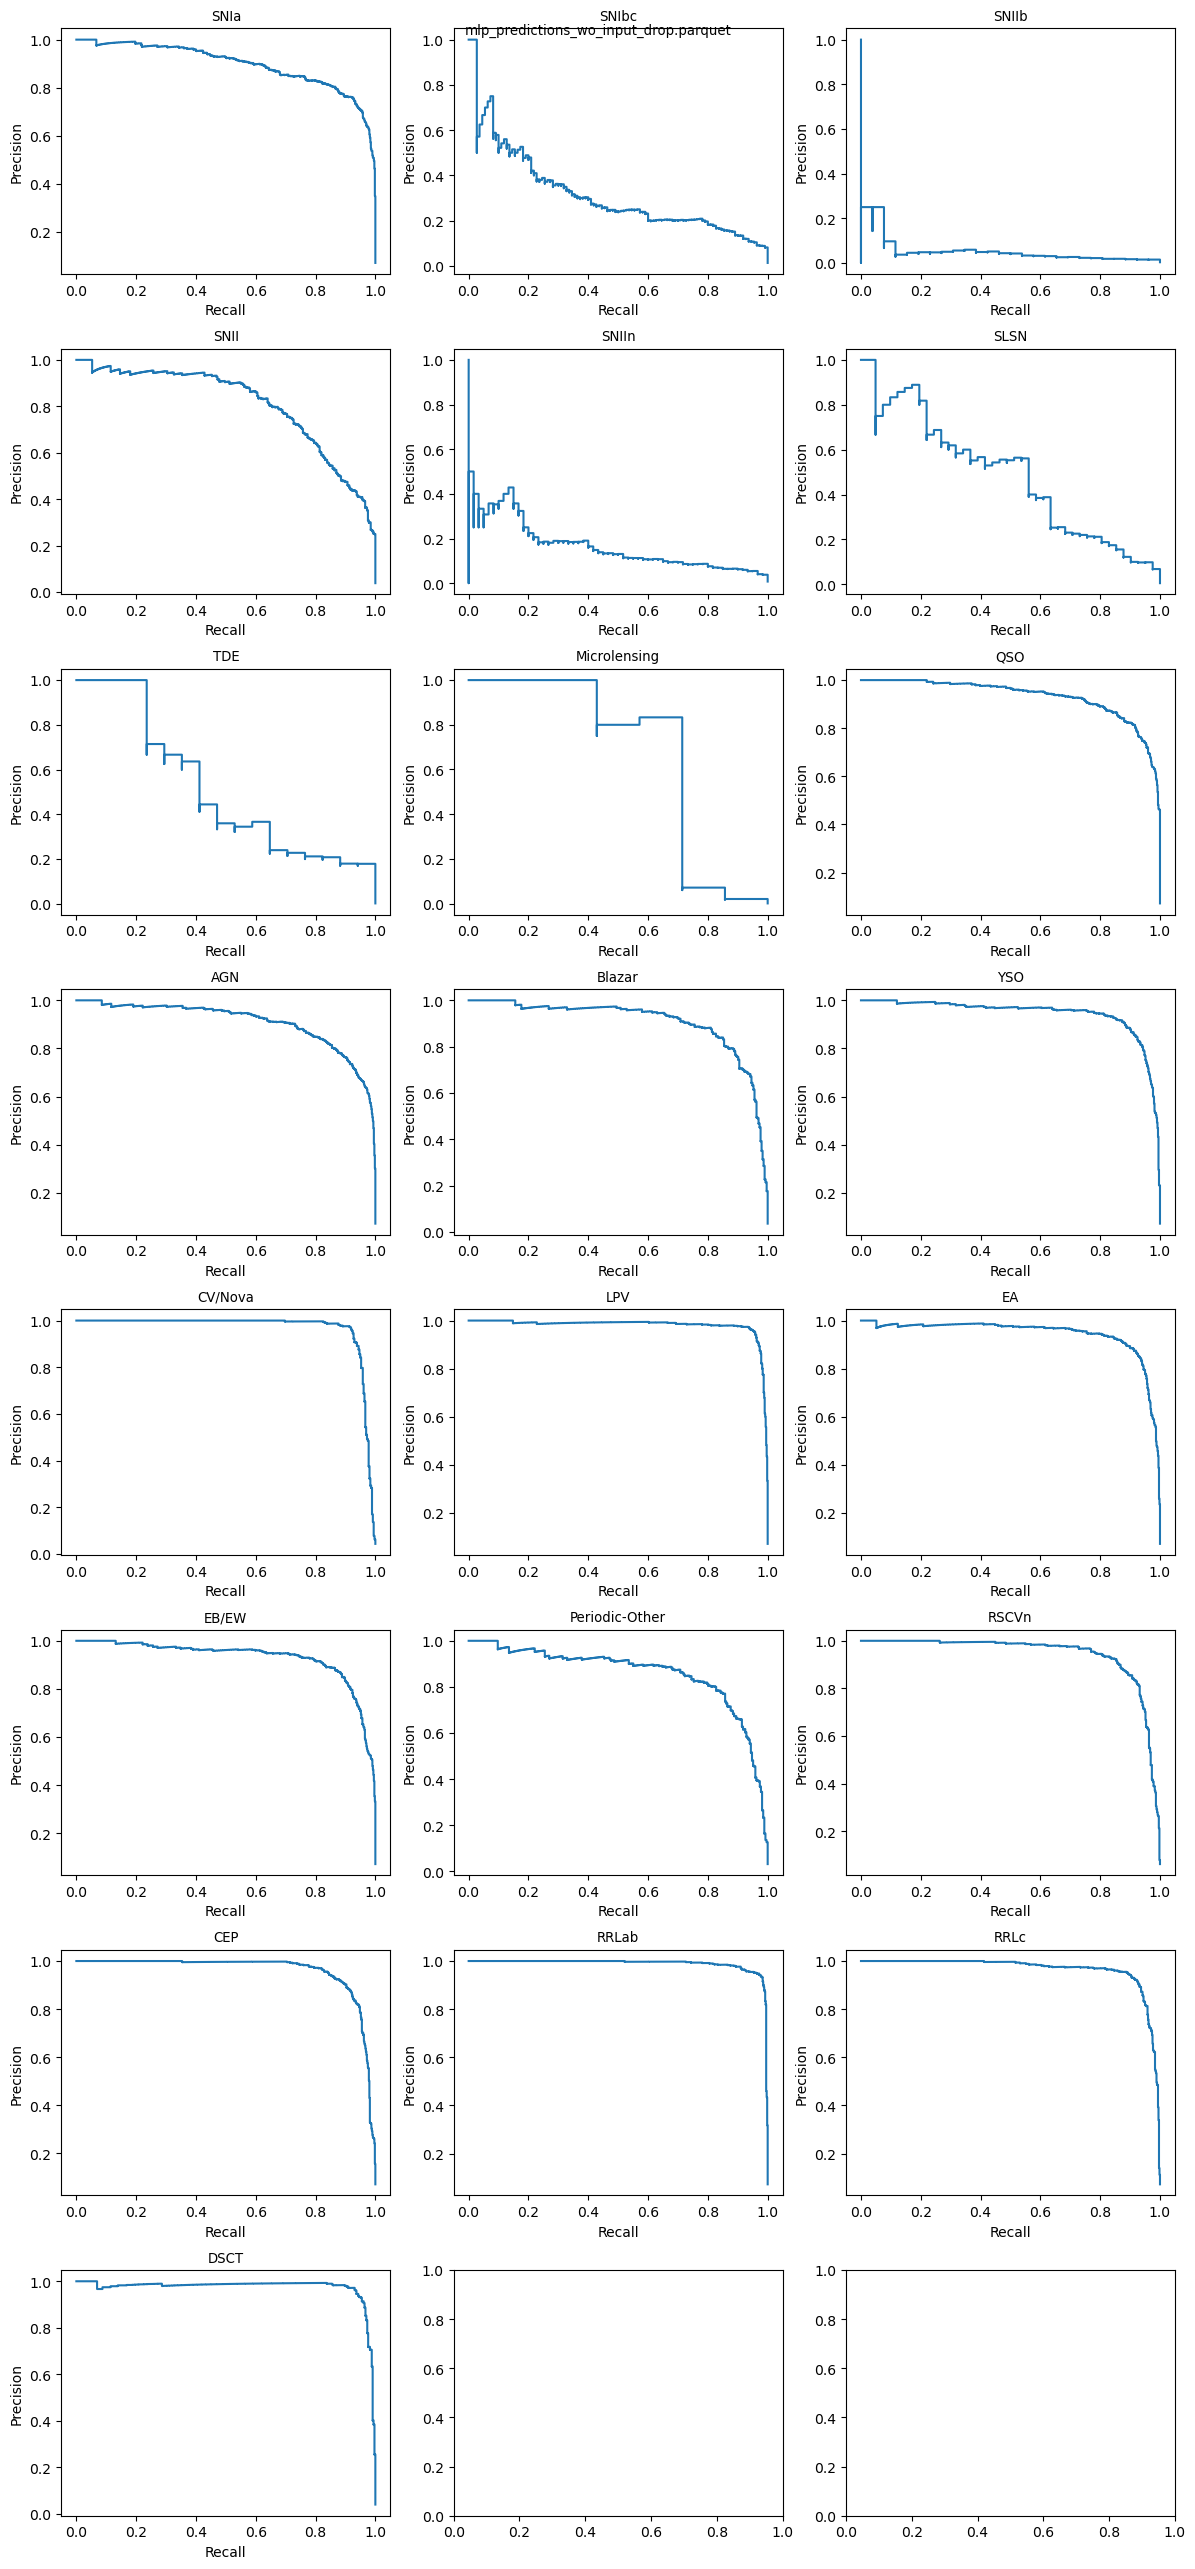

In [4]:
shorten = 'None'
shorten_predictions = predictions[predictions['shorten'] == shorten]
shorten_predictions = shorten_predictions[[c for c in shorten_predictions.columns if c != 'shorten']]

fig, ax = plt.subplots(8, 3, figsize=(12, 26), facecolor='white', dpi=100)
plt.rcParams.update({'font.size': 8})

test_labels = labels[labels['partition'] == 'test']

for i, astro_class in enumerate(labels_figure_order):
    y_test_binary = (test_labels['alerceclass'] == astro_class).astype(int).values
    y_score_binary = shorten_predictions.loc[test_labels.index][astro_class].values
    prec, recall, _ = precision_recall_curve(y_test_binary, y_score_binary)
    ax_subplot = ax[i // 3][i % 3]
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot(ax_subplot)
    ax_subplot.set_title(astro_class)

plt.suptitle(predictions_filename)
plt.tight_layout()
plt.show()